## <center> Video Links </center> ##
Duc Vo: https://www.youtube.com/watch?v=fbWkODJSUiA

Ty Gehrke: https://www.loom.com/share/4d6b7a06f68d4fb28714c7100f6daa9a?sid=b11e224b-5e86-420b-814d-567ee9267c77

# <center> Performance Predictions </center> #
File created by Ty Gehrke and Duc Vo

In the dynamic landscape of financial markets, characterized by volatility and unpredictability, the utilization of linear
models stands as a pivotal approach for investors. This project focuses on leveraging the predictive capabilities of multiple linear regression to forecast the future performance of NVIDIA's publicly traded stock. By delving into historical data extracted from Yahoo Finance, the objective is to conduct a meticulous exploration of NVIDIA's stock characteristics. This comprehensive analysis, documented in a structured technical report, encompasses key stages such as data preparation, constructing a multiple linear regression model, interpretation of regression outputs, and model accuracy assessment. Ultimately, the project aims not only to predict NVIDIA's stock performance but also to provide insights into its investment worthiness.


## <center> Data Description </center> ##
This data was downloaded from Yahoo Finances: [NVIDIA Stock Historical Data](https://finance.yahoo.com/quote/NVDA/history?p=NVDA)
The data has 7 columns, Date, Open Price, High and Low Prices, Closing Price, Adjusted Closing Price, and Volume. The model will be applied to this data to predict the closing price of the stock. There are no missing values, as the data comes from a well known and documented stock.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

delimiter = ','
# Assuming the dataset is a CSV file
df = pd.read_csv('NVDA.csv', delimiter=delimiter)

# Displaying the first 100 rows of the dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-23,180.639999,192.449997,178.179993,191.929993,191.844879,65516300
1,2023-01-24,188.270004,194.949997,188.199997,192.649994,192.564545,49620400
2,2023-01-25,189.130005,193.699997,185.800003,193.229996,193.144302,44953700
3,2023-01-26,197.009995,201.660004,192.779999,198.020004,197.932175,48953500
4,2023-01-27,194.619995,206.279999,194.050003,203.649994,203.559677,54214200
5,2023-01-30,199.500000,201.399994,191.500000,191.619995,191.535019,48861100
6,2023-01-31,191.699997,196.869995,189.500000,195.369995,195.283340,49801700
7,2023-02-01,196.910004,211.919998,196.110001,209.429993,209.337112,66047700
8,2023-02-02,210.000000,219.490005,207.000000,217.089996,216.993713,56427600
9,2023-02-03,210.000000,217.449997,207.889999,211.000000,210.906418,42936600


## <center> Data Preprocessing </center> ##
The dataset representing NVIDIA's stock historical data obtained from Yahoo Finance exhibits a pristine quality, devoid of any missing values. This condition eliminates the necessity for extensive preprocessing steps to handle data gaps or inconsistencies. The absence of missing values ensures that the dataset is ready for direct utilization in model development without the need for imputation or interpolation techniques. The only preprocessing step deemed essential is the removal of the 'Date' column, which is not a predictive feature in the context of this analysis.

In [22]:
df.drop('Date', axis=1, inplace=True)

df.head(10)

,Open,High,Low,Close,Adj Close,Volume
0,180.639999,192.449997,178.179993,191.929993,191.844879,65516300
1,188.270004,194.949997,188.199997,192.649994,192.564545,49620400
2,189.130005,193.699997,185.800003,193.229996,193.144302,44953700
3,197.009995,201.660004,192.779999,198.020004,197.932175,48953500
4,194.619995,206.279999,194.050003,203.649994,203.559677,54214200
5,199.500000,201.399994,191.500000,191.619995,191.535019,48861100
6,191.699997,196.869995,189.500000,195.369995,195.283340,49801700
7,196.910004,211.919998,196.110001,209.429993,209.337112,66047700
8,210.000000,219.490005,207.000000,217.089996,216.993713,56427600
9,210.000000,217.449997,207.889999,211.000000,210.906418,42936600


## <center> Analytical Model Description </center> ##
The analytical model implemented in this code aims to explore the relationship between various features (such as 'Open', 'High', 'Low', and 'Volume') and the target variable 'Adj Close' for NVIDIA's publicly traded stock. The chosen approach involves polynomial regression, indicating linear regression for each feature. The analysis is conducted on both training and testing datasets, with an emphasis on visualizing the model's fit, assessing performance metrics, and interpreting the results.


## <center> Pipeline Used </center> ##
The chosen methodology employs polynomial regression with a degree of 1, effectively implementing linear regression for each feature. This approach allows us to capture the linear trends in the data, providing a baseline understanding of how changes in each feature influence the 'Adj Close' values. While the model's degree was tested at a higher level, the results remained largely consistent, suggesting that the linear relationships between features and the target variable dominate the underlying patterns. Hence we decide to go with the degree of 1

## <center> Assumption Verification </center> ##
In anticipation of model implementation, we formulated a set of assumptions centered on the anticipated relationships between individual features and the target variable, 'Adjusted Closing.' Specifically, we hypothesized that 'Open' would emerge as the primary determinant influencing 'Adjusted Closing,' given its inherent significance in stock trading dynamics. Conversely, we assumed that 'Volume,' characterized by its inherent volatility, would exhibit a less pronounced influence on predictions. Furthermore, we deemed 'Low' and 'High' as less suitable for direct prediction purposes. Anchored in these assumptions, we expected the residuals for 'Open' to adhere to a normal distribution, reflecting a well-fitted model. Following the model's execution and subsequent analysis, our predictions were substantiated. The observed outcomes aligned with our initial assumptions, reinforcing the pivotal role of 'Open' and validating our assumption regarding the normal distribution of residuals. This verification process affirms the model's coherence with our prior expectations, offering valuable insights into the predictive dynamics of individual features in the context of NVIDIA's stock data.


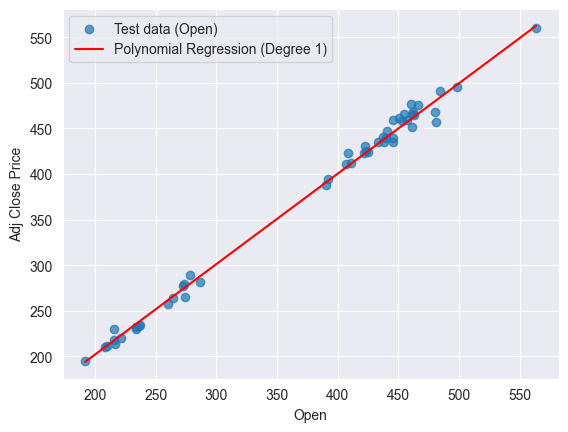

R-squared Value: 0.9948043427804163
Mean Squared Error: 56.76465026608405
Residuals:
142   -10.324519
6       1.336941
97      2.352119
60      4.131926
112     1.617754
181     6.302885
197     1.721493
184    10.419091
9      -1.171351
104     7.527431
200     2.519642
216   -12.168621
236    -2.332685
240     6.802831
67      3.659890
224    16.340209
194     0.477024
15      0.375188
177     6.386993
24     -3.625983
247    -1.760522
19     -4.544480
114     1.624672
68      9.173409
176     2.969146
45     -2.018125
55    -10.313290
10      0.640819
30     -5.021928
120     1.893455
201     4.934205
33     -6.358651
141    -6.181581
219    11.176747
25     -3.522140
111    -1.207243
18     -3.380943
196    14.127323
180     5.002124
159    -9.500153
118    14.601108
96     -3.151671
108     4.233879
185    -0.616973
222     9.390769
16     11.803618
146   -24.325110
69     -6.147257
173    -3.292522
38     -4.259094
Name: Adj Close, dtype: float64


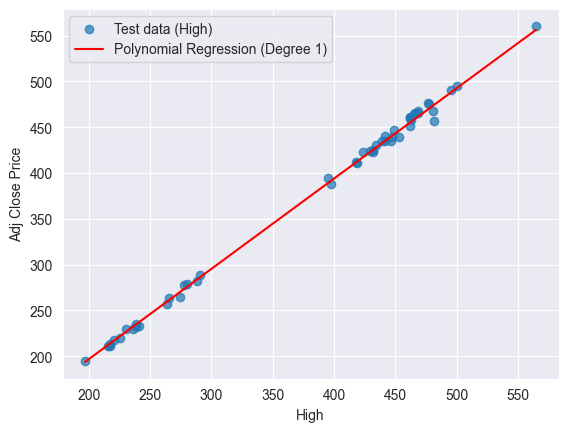

R-squared Value: 0.9980183100687102
Mean Squared Error: 21.650761613272557
Residuals:
142    -5.265257
6       1.398330
97      5.386938
60      3.454025
112    -2.195844
181     6.452285
197     2.763025
184     5.588678
9      -3.252724
104     2.429940
200     4.257742
216    -6.231750
236     2.739806
240     2.922925
67      4.018582
224     7.053364
194     0.180263
15      0.639279
177     4.572994
24     -0.286087
247     4.272011
19     -0.324741
114    -0.700689
68      2.818636
176     5.561040
45      2.897204
55     -5.661055
10     -1.638688
30     -4.789163
120     6.540363
201     4.053633
33     -3.112308
141    -6.567869
219     6.644931
25     -2.592952
111     1.512477
18     -2.167078
196     5.760680
180     2.284008
159    -2.969762
118     5.060512
96     -3.514932
108    -1.071790
185    -1.488073
222     4.804502
16      2.602781
146   -18.046997
69     -1.992434
173     0.131655
38     -2.827838
Name: Adj Close, dtype: float64


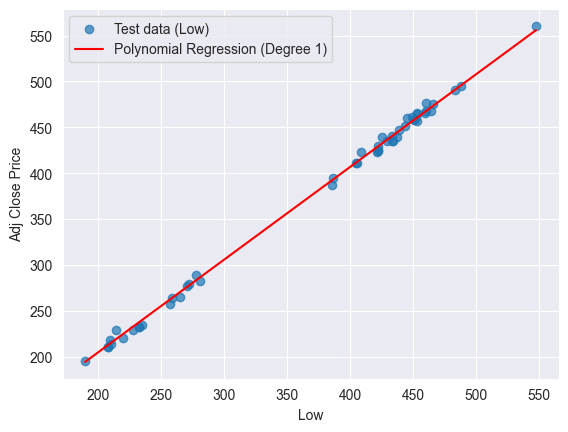

R-squared Value: 0.9983314820274801
Mean Squared Error: 18.229231677519056
Residuals:
142    -6.595148
6       1.000199
97      1.748591
60      1.270906
112    -4.936027
181    -0.076591
197    -1.186179
184     4.312135
9      -1.957565
104     0.637317
200     0.426713
216    -4.195151
236    -0.165757
240     0.080435
67      1.078141
224     8.514980
194    -0.253732
15      3.171454
177     0.589635
24     -4.884792
247     4.632747
19     -0.958145
114    -4.036187
68      5.521409
176     0.142025
45      0.028519
55     -5.163757
10     -2.037211
30     -4.822191
120     4.397213
201    -1.567898
33     -2.847864
141    -5.127458
219     5.435403
25     -5.227754
111    -5.158343
18     -4.439660
196     7.465006
180    -0.435866
159     1.205181
118     7.337929
96     -4.854911
108    -1.101353
185     7.316409
222     1.912659
16     10.914258
146    -4.248828
69     -4.538111
173    -5.429050
38     -4.980700
Name: Adj Close, dtype: float64


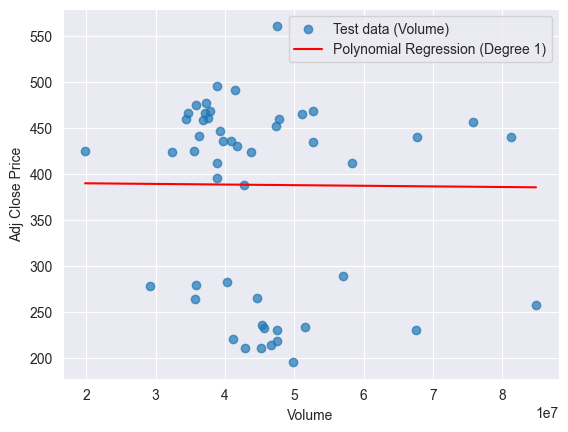

R-squared Value: -0.014092199736069011
Mean Squared Error: 11079.366213499832
Residuals:
142     47.534557
6     -192.165931
97       6.568486
60    -109.152760
112     34.476064
181     79.763539
197     46.975111
184     72.633737
9     -177.004449
104     42.187700
200     71.019116
216     80.399448
236    107.035636
240    102.959635
67    -111.422563
224     88.276024
194     23.384976
15    -169.821191
177     58.688591
24    -152.846251
247    172.921922
19    -173.880159
114     36.548453
68     -97.942184
176     52.006250
45    -124.375757
55    -122.919780
10    -176.960893
30    -154.517791
120     77.165466
201     77.232466
33    -158.017806
141     53.076061
219     77.361522
25    -155.674981
111     34.592646
18    -168.105034
196     35.357249
180     69.620191
159     64.129280
118     72.109221
96      -0.291293
108     24.219718
185     54.005502
222     86.674678
16    -156.647959
146     70.895678
69    -106.067166
173     46.824748
38    -127.912776
Name: Adj C

In [23]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 1
poly_features = PolynomialFeatures(degree=degree)

for feature in X.columns:
    X_train_poly = poly_features.fit_transform(X_train[[feature]])
    X_test_poly = poly_features.transform(X_test[[feature]])

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    sorted_indices = X_test[feature].argsort()

    #plt.scatter(X_train[feature], y_train, label=f'Training data ({feature})', alpha=0.7)
    plt.scatter(X_test[feature], y_test, label=f'Test data ({feature})', alpha=0.7)
    plt.plot(X_test[feature].iloc[sorted_indices], y_pred[sorted_indices], label=f'Polynomial Regression (Degree {degree})', color='red')
    plt.xlabel(feature)
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.show()
    
    r_squared = r2_score(y_test, y_pred)
    print(f'R-squared Value: {r_squared}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    residuals = y_test - y_pred
    print("Residuals:")
    print(residuals)

## <center> Model Validation </center> ##
The model validation process revealed a generally robust performance across all features, yielding coherent and meaningful results. However, a distinctive pattern emerged in the 'Volume' category, where the model exhibited less satisfactory outcomes. Recognizing the volatility inherent in 'Volume' data and its unique characteristics, the decision was made to exclude this feature from the model for the purpose of refinement. The exclusion of 'Volume' aims to enhance the model's overall accuracy and interpretability by focusing on features that contribute more consistently to predicting the 'Adjusted Close' values.


## <center> Model Improvement </center> ##

In the above graphs, volume is shown to have a very weak correlation, shown by the R^2 value of -0.014, and is therefore unnecessary to the regression model. The code is then rewritten below to remove 'Volume' from the features.

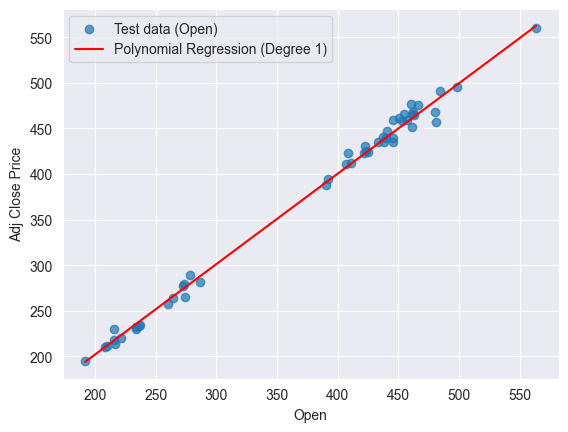

R-squared Value: 0.9948043427804163
Mean Squared Error: 56.76465026608405
Sorted Residuals:
         Actual   Predicted  Residuals
146  456.602203  480.927313 -24.325110
216  467.658905  479.827526 -12.168621
142  434.785919  445.110438 -10.324519
55   264.877502  275.190792 -10.313290
159  451.740265  461.240418  -9.500153
33   229.587128  235.945779  -6.358651
141  439.325165  445.506746  -6.181581
69   282.022797  288.170054  -6.147257
30   232.816254  237.838182  -5.021928
19   213.785141  218.329621  -4.544480
38   257.179596  261.438690  -4.259094
24   234.905746  238.531729  -3.625983
25   232.057053  235.579193  -3.522140
18   219.922424  223.303367  -3.380943
173  434.951752  438.244274  -3.292522
96   387.634003  390.785674  -3.151671
236  495.220001  497.552686  -2.332685
45   264.027710  266.045835  -2.018125
247  560.530029  562.290551  -1.760522
111  424.057770  425.265013  -1.207243
9    210.906418  212.077769  -1.171351
185  439.341370  439.958343  -0.616973
15   217.78

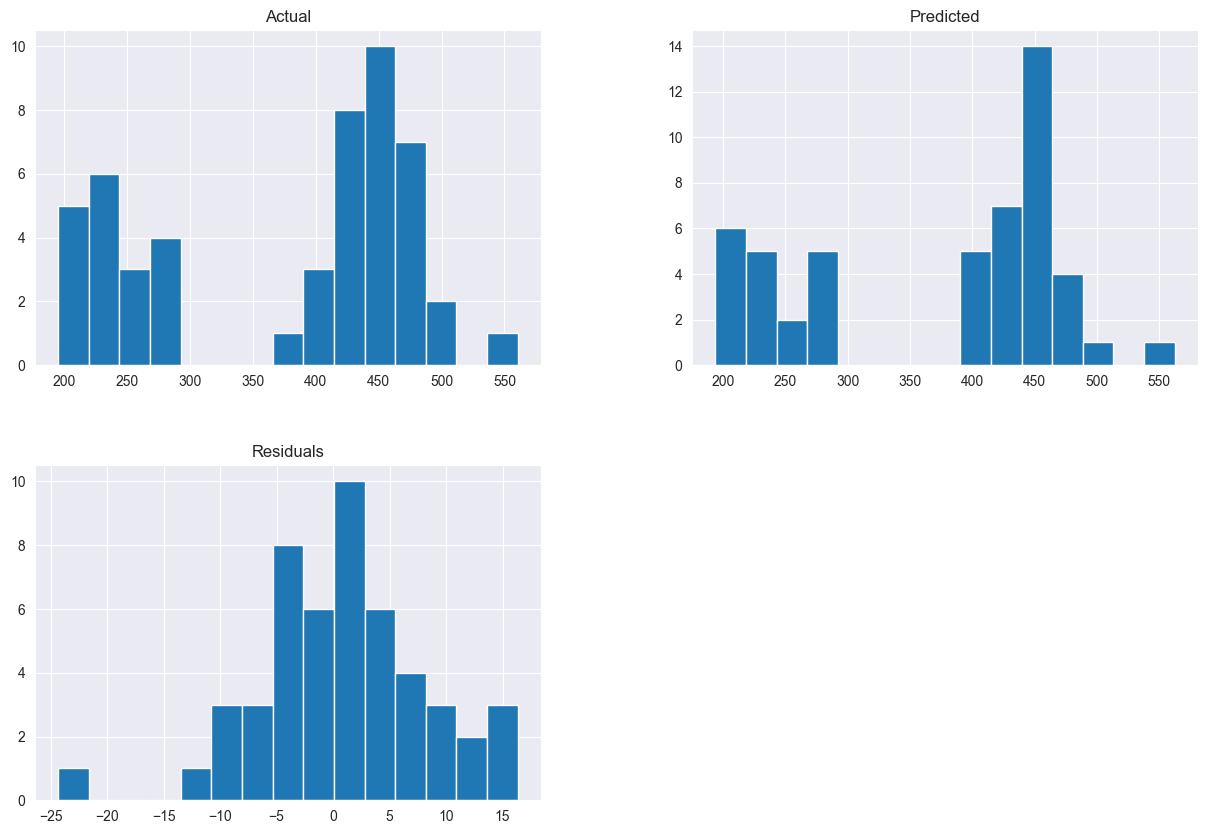

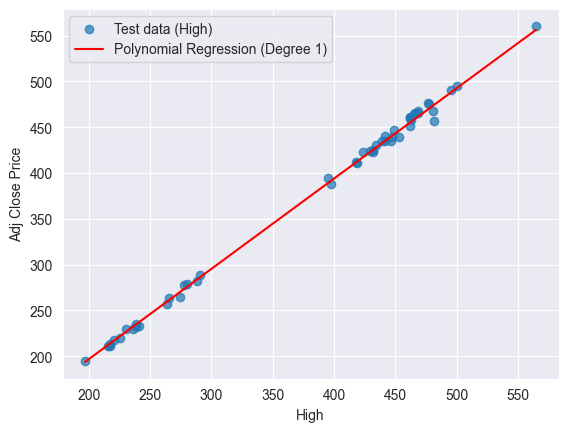

R-squared Value: 0.9980183100687102
Mean Squared Error: 21.650761613272557
Sorted Residuals:
         Actual   Predicted  Residuals
146  456.602203  474.649200 -18.046997
141  439.325165  445.893034  -6.567869
216  467.658905  473.890655  -6.231750
55   264.877502  270.538557  -5.661055
142  434.785919  440.051176  -5.265257
30   232.816254  237.605417  -4.789163
96   387.634003  391.148935  -3.514932
9    210.906418  214.159142  -3.252724
33   229.587128  232.699436  -3.112308
159  451.740265  454.710027  -2.969762
38   257.179596  260.007434  -2.827838
25   232.057053  234.650005  -2.592952
112  423.097961  425.293805  -2.195844
18   219.922424  222.089502  -2.167078
69   282.022797  284.015231  -1.992434
10   210.796463  212.435151  -1.638688
185  439.341370  440.829443  -1.488073
108  411.100006  412.171796  -1.071790
114  424.957642  425.658331  -0.700689
19   213.785141  214.109882  -0.324741
24   234.905746  235.191833  -0.286087
173  434.951752  434.820097   0.131655
194  411.5

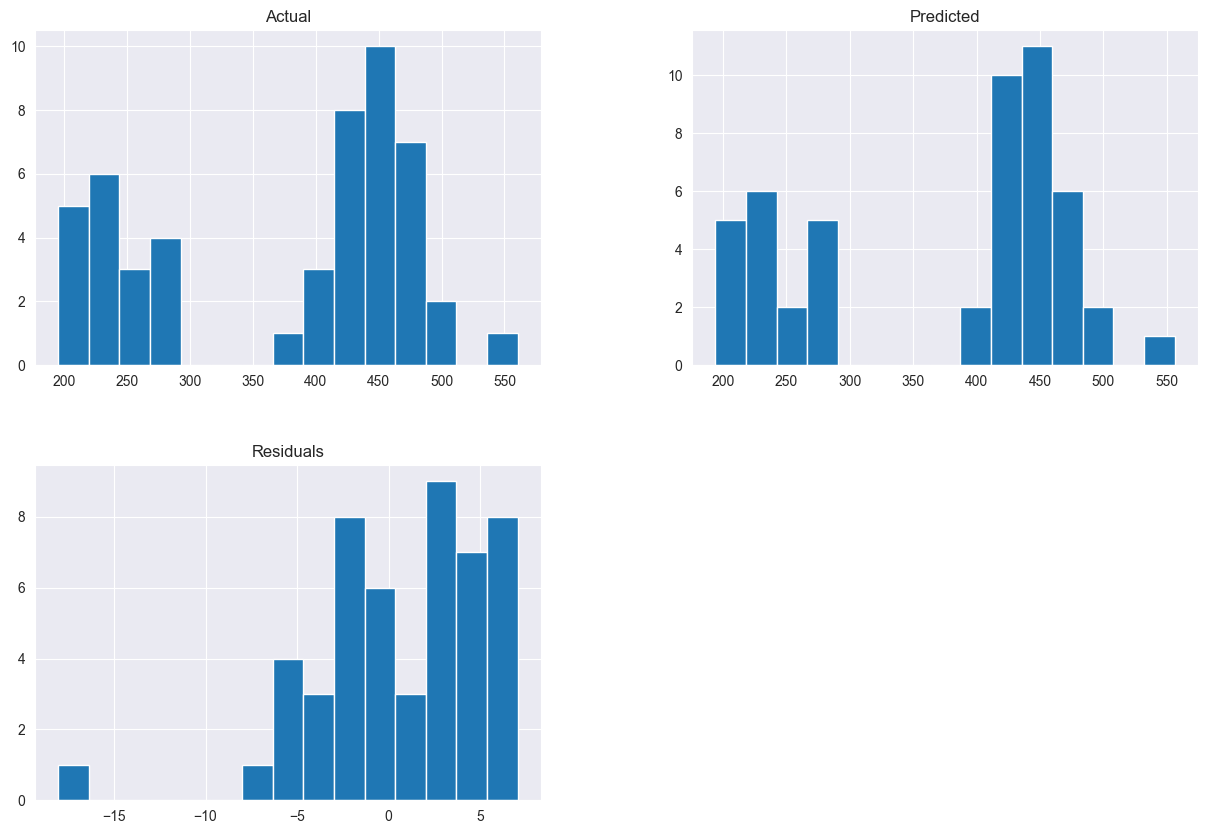

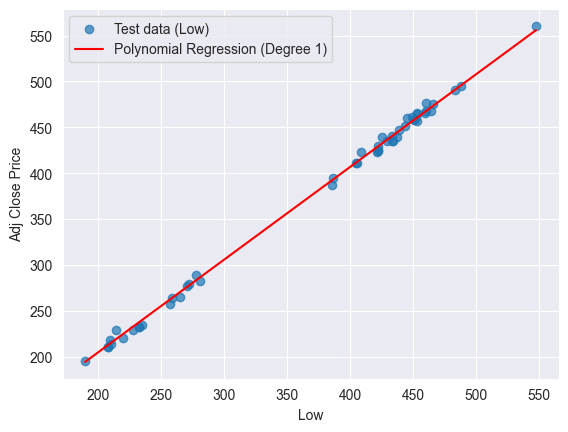

R-squared Value: 0.9983314820274801
Mean Squared Error: 18.229231677519056
Sorted Residuals:
         Actual   Predicted  Residuals
142  434.785919  441.381067  -6.595148
173  434.951752  440.380802  -5.429050
25   232.057053  237.284807  -5.227754
55   264.877502  270.041259  -5.163757
111  424.057770  429.216113  -5.158343
141  439.325165  444.452623  -5.127458
38   257.179596  262.160296  -4.980700
112  423.097961  428.033988  -4.936027
24   234.905746  239.790538  -4.884792
96   387.634003  392.488914  -4.854911
30   232.816254  237.638445  -4.822191
69   282.022797  286.560908  -4.538111
18   219.922424  224.362084  -4.439660
146  456.602203  460.851031  -4.248828
216  467.658905  471.854056  -4.195151
114  424.957642  428.993829  -4.036187
33   229.587128  232.434992  -2.847864
10   210.796463  212.833674  -2.037211
9    210.906418  212.863983  -1.957565
201  465.699036  467.266934  -1.567898
197  435.021759  436.207938  -1.186179
108  411.100006  412.201359  -1.101353
19   213.7

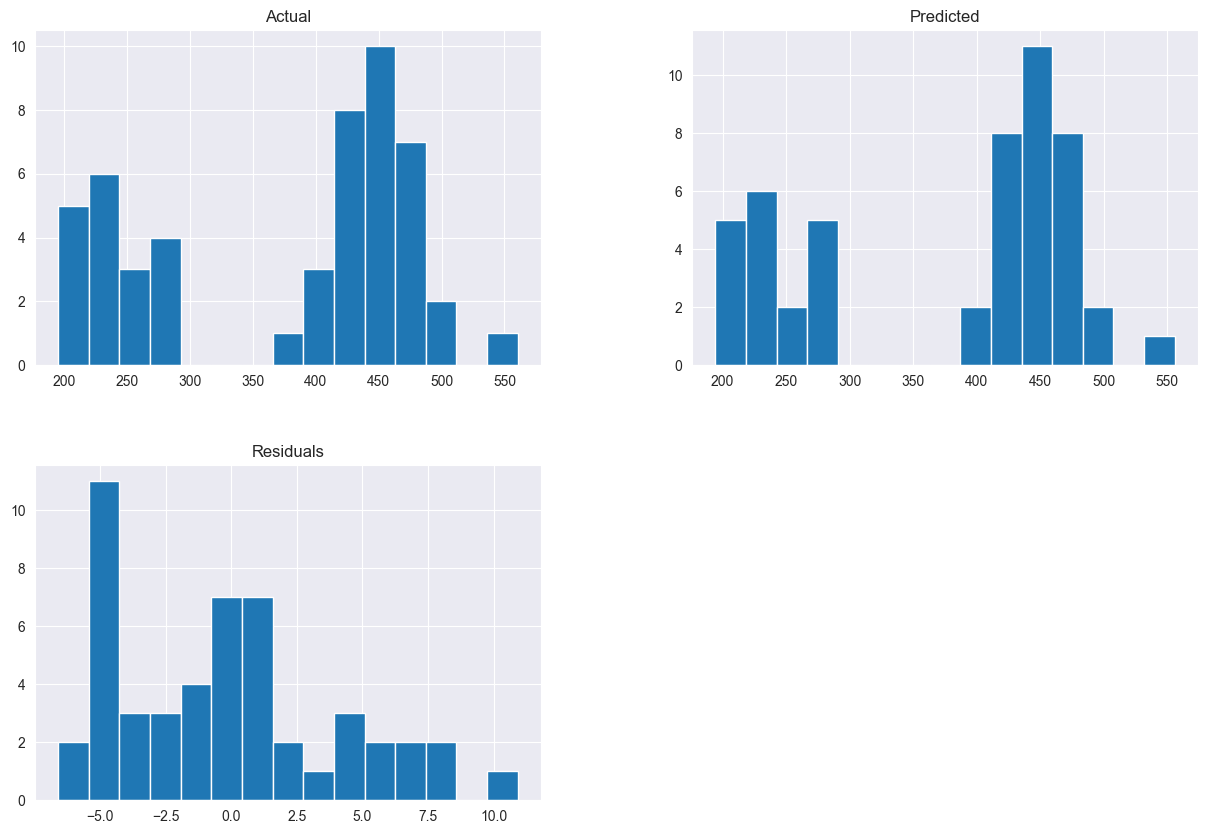

In [24]:
X = df[['Open', 'High', 'Low']]
y = df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 1
poly_features = PolynomialFeatures(degree=degree)

for feature in X.columns:
    X_train_poly = poly_features.fit_transform(X_train[[feature]])
    X_test_poly = poly_features.transform(X_test[[feature]])

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    sorted_indices = X_test[feature].argsort()

    #plt.scatter(X_train[feature], y_train, label=f'Training data ({feature})', alpha=0.7)
    plt.scatter(X_test[feature], y_test, label=f'Test data ({feature})', alpha=0.7)
    plt.plot(X_test[feature].iloc[sorted_indices], y_pred[sorted_indices], label=f'Polynomial Regression (Degree {degree})', color='red')
    plt.xlabel(feature)
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.show()
    
    r_squared = r2_score(y_test, y_pred)
    print(f'R-squared Value: {r_squared}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    residuals = y_test - y_pred
    # Create a DataFrame with actual values, predicted values, and residuals
    residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})
    
    # Sort the DataFrame by residuals in ascending order
    sorted_residuals_df = residuals_df.sort_values(by='Residuals')
    
    # Display the sorted DataFrame
    print("Sorted Residuals:")
    print(sorted_residuals_df)
    residuals_df.hist(bins=15, figsize=(15, 10))
    plt.show()  

## <center> Analysis & Errors </center> ##
The analysis of our model unveils a compelling linear structure, evidenced by a notably high R-squared value. This outcome signifies a robust correlation and precision, indicating that the model has successfully captured and explained a significant proportion of the variance in the 'Adjusted Close' values. The high accuracy of predictions, particularly in the context of a strong correlation, enhances the investment worthiness of the model. However, it is crucial to underscore the model's dependency on receiving accurate 'Open' values, as this feature plays a pivotal role in the prediction process. The precision and reliability observed in our linear model underscore its potential as a valuable tool for investment decision-making, contingent upon the availability of precise and reliable 'Open' data for NVIDIA's stock.

The model has high R-squared values of 0.995 for Open, 0.998 for High, and 0.998 for Low. This shows low errors in the model, as the relationship between the actual and predicted values is very excellent, almost a perfect score of 1. There is not a lot of human error in the data, because the data comes from the value of the stock market, which would be recorded by a computer.


## <center> Christian Worldview </center> ##
Integrating a Christian worldview into investment decisions extends beyond financial metrics, emphasizing values, ethics, and spiritual priorities. A Christian investor would prioritize a company's alignment with biblical principles, assessing ethical practices and corporate responsibility alongside financial metrics. Stewardship, central to this perspective, recognizes money as a resource entrusted by God, prompting considerations beyond mere financial gain. Qualitative assessments of a company's social impact, environmental practices, and ethical standards become integral to decision-making. 

The Christian worldview places faith and obedience to God above financial pursuits, encouraging investors to prioritize spiritual well-being and uphold moral integrity, even if it means foregoing certain financial gains. As stated in Proverbs 16:9 (NIV): "In their hearts humans plan their course, but the LORD establishes their steps". This Bible verse speaks to the acknowledgment of human planning and decision-making, while highlighting the ultimate guidance and sovereignty of God in determining the course of our lives
 
This holistic approach, guided by prayer and discernment, ensures that investment decisions align not only with financial viability but also with ethical and moral convictions, reflecting a commitment to stewardship and a Christian worldview that places God at the forefront of priorities.


## <center> References </center> ##
New International Version (2011). Proverbs 16:9. Retrieved from https://www.biblegateway.com/passage/?search=Proverbs+16%3A9&version=NIV

Leite, B. S. C. F. (2022, November 24). Multiple linear regression: Theory and applications. Medium. https://towardsdatascience.com/multiple-linear-regression-theory-and-applications-677ec2cd04ac?gi=7aeb7cdfef2e

Yahoo! (2024, January 22). Nvidia Corporation (NVDA) Stock Historical Prices & Data. Yahoo! Finance. https://finance.yahoo.com/quote/NVDA/history?p=NVDA 
